<p style="text-align:center">
PSY 394U <b>Data Analytics with Python</b>, Spring 2018


<img style="width: 400px; padding: 0px;" src="https://github.com/sathayas/JupyterAnalyticsSpring2018/blob/master/images/Title_pics.png?raw=true" alt="title pics"/>

</p>

<p style="text-align:center; font-size:40px; margin-bottom: 30px;"><b>Principal Component Analysis (PCA)</b></p>

<p style="text-align:center; font-size:18px; margin-bottom: 32px;"><b>January 18, 2018</b></p>

<hr style="height:5px;border:none" />

# 1. Motivation
<hr style="height:1px;border:none" />

Say, your data consists of a number of correlated variables. A **principal component analysis** (**PCA**) allows you to transform such data into a small number of uncorrelated variables, known as **principal components**. Principal components (PCs) are ordered so that the first PC explains the most variability in the data, the second PC explaining the second most variability, and so on. A PCA is this considered a *dimension reduction method*, transforming a high-dimensional data set into a lower dimensional space.

## Iris data
This is a famous data set with lengths and widths of the petal and the sepal of 3 different types of irises (Setosa, Versicolour, and Virginica). This is one of example data sets available in Scikit-learn. The data is stored in a 2D array of 150 rows (150 irises) and 4 columns of ***features*** (a.k.a., variables) (sepal length, sepal width, petal length and petal width).

<img style="width: 300px; padding: 0px;" src="https://github.com/sathayas/JupyterAnalyticsSpring2018/blob/master/images/PCA_Iris.jpg?raw=true" alt="Iris with labels"/>
<p style="text-align:center; font-size:10px; margin-top: 0px;">Source: https://www.math.umd.edu/~petersd/666/html/iris_pca.html </p>

Let's take a look at the data set. First, we generate scatter plots. First, those who are using Jupyter notebook need to run this line.

In [1]:
%matplotlib inline

Here is a program to plot data, all the features against each other.

`<IrisDataPlot.py>`

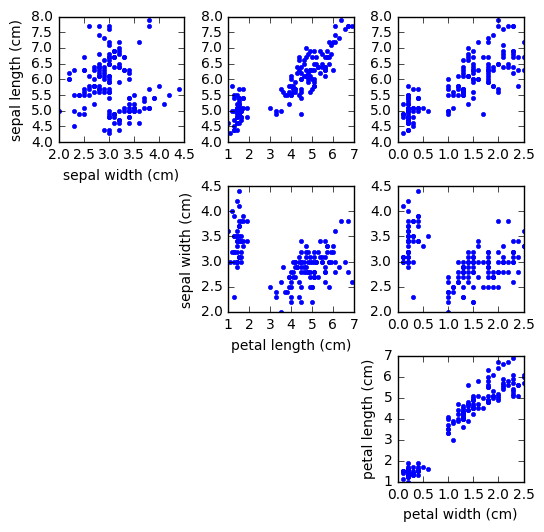

In [2]:
# Plotting the iris data

import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets

# loading the iris data set
iris = datasets.load_iris()
X = iris.data   # 2D data array
varNames = iris.feature_names  # variable names
nVar = X.shape[1]  # number of features

# plotting the data
plt.figure(figsize=[6, 6])

# generating subplots
for iRow in range(nVar-1):  # subplot row index
    for iCol in range(iRow+1, nVar):  # subplot column index
        indPlot = (nVar-1)*iRow + iCol
        plt.subplot(nVar-1, nVar-1, indPlot)
        plt.plot(X[:,iCol], X[:,iRow], 'b.')
        if iCol==iRow+1:
            plt.xlabel(varNames[iCol])
            plt.ylabel(varNames[iRow])

# adjusting the space between subplots
plt.subplots_adjust(wspace=0.35, hspace=0.35)


plt.show()


You notice that these features are correlated. You may also notice that how cumbersome it is just to examine the data set. The more features you have, the more complicated the plots become. So perhaps we can generate a *summary* feature encompassing variability of all these features. 

  * Motivating example (Iris)
  * Normalization
  * Face data